# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = "SpamData/03_Testing/prob-spam.txt"
TOKEN_HAM_PROB_FILE = "SpamData/03_Testing/prob-nonspam.txt"
TOKEN_ALL_PROB_FILE = "SpamData/03_Testing/prob-all-tokens.txt"

TEST_FEATURE_MATRIX = "SpamData/03_Testing/test-features.txt"
TEST_TARGET_FILE = "SpamData/03_Testing/test-target.txt"

VOCAB_SIZE = 2500

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=" ")

# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=" ")

# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=" ")
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=" ")
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=" ")

# Calculating the Joint Probability

### The Dot Product

In [4]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])

a.dot(b)

22

In [5]:
c = np.array([[0, 6], [3, 0], [5, 1]])
c.shape

(3, 2)

In [6]:
print(a.dot(c))

[21  9]


In [7]:
print(f"Shape of X_test {X_test.shape}")
print(f"Shape of prob_token_spam {prob_token_spam.shape}")
print(f"Shape of the dot product is {X_test.dot(prob_token_spam).shape}")

Shape of X_test (1724, 2500)
Shape of prob_token_spam (2500,)
Shape of the dot product is (1724,)


## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [8]:
PROB_SPAM = 0.311 # from previous notebook

In [9]:
np.log(prob_token_spam)

array([ -4.40759195,  -5.25366675,  -4.99006919, ...,  -9.26099994,
        -9.38616308, -11.4010661 ])

## Joint probability in log format

In [10]:
# Log P(Spam | X)
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [11]:
joint_log_spam[:5]

array([24.28168047,  2.16112748, 20.59151614, 17.75672733, 20.51528344])

In [12]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<br>
<center><b>OR</b></center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [13]:
predictions = joint_log_spam > joint_log_ham

### Simplify

$$P(X \, | \, Spam) \, P(Spam) ≠ \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [14]:
# P(X) in both formulas, but we are comparing so it cancels out

joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)

# Metrics and Evaluation

## Accuracy

In [15]:
correct_docs = (y_test == predictions).sum()
wrong_docs = X_test.shape[0] - correct_docs
print("Docs classified correctly", correct_docs)
print("Docs classified incorrectly", wrong_docs)

Docs classified correctly 1685
Docs classified incorrectly 39


In [16]:
# Accuracy
correct_docs/len(X_test)

0.9773781902552204

In [17]:
fraction_wrong = wrong_docs/len(X_test)
print("Fraction classified incorrectly is {:.2%}".format(fraction_wrong))
print("Accuracy of the model is {:.2%}".format(1-fraction_wrong))

Fraction classified incorrectly is 2.26%
Accuracy of the model is 97.74%


## Visualizing the results

In [18]:
# Chart Styling Info
yaxis_label = "P(X | Spam)"
xaxis_label = "P(X | Nonspam)"

linedata = np.linspace(start=-14000, stop=1, num=1000)

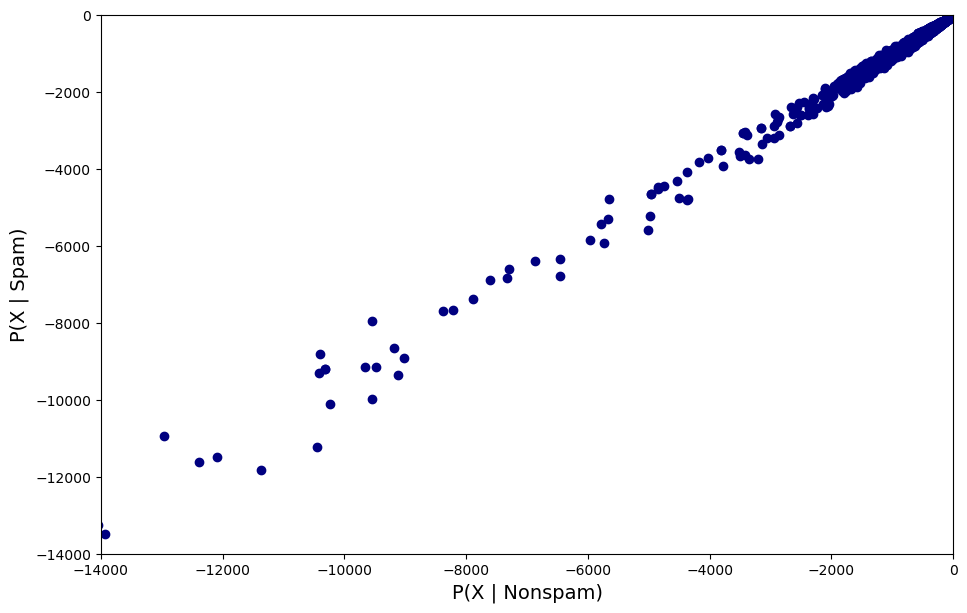

In [19]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color="navy")
plt.show()

## The Decision Boundary

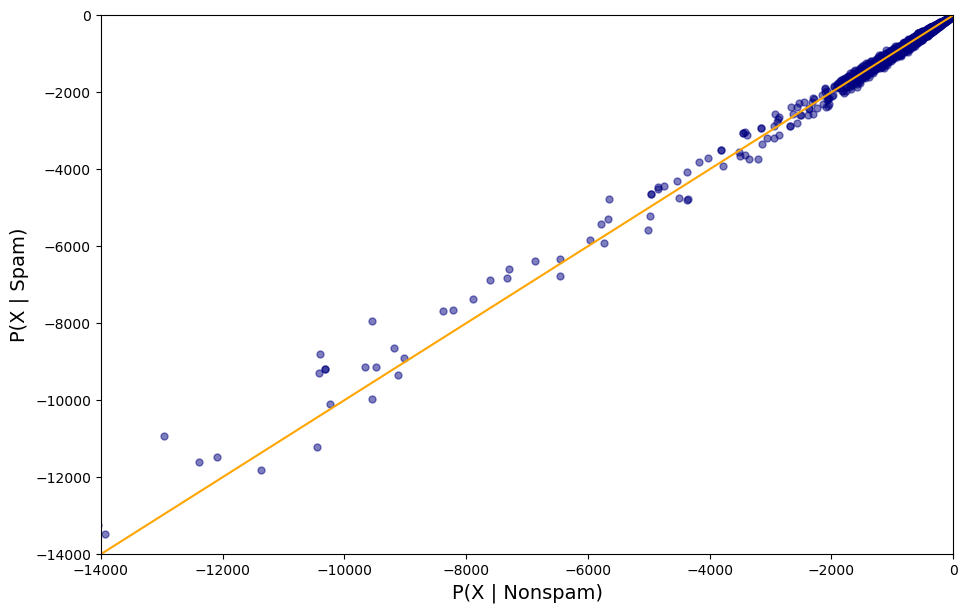

In [20]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color="navy", alpha=0.5, s=25)
plt.plot(linedata, linedata, color="orange")

plt.show()

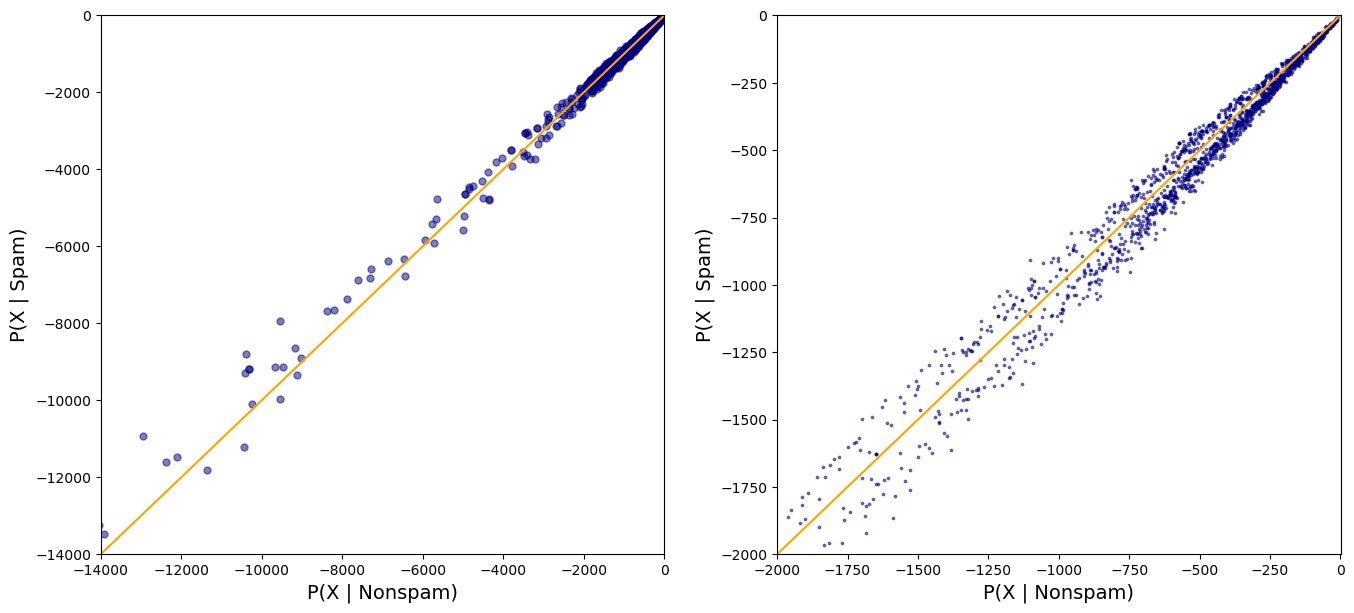

In [21]:
plt.figure(figsize=(16, 7))

# Chart Nr 1
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color="navy", alpha=0.5, s=25)
plt.plot(linedata, linedata, color="orange")

# Chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color="navy", alpha=0.5, s=3)
plt.plot(linedata, linedata, color="orange")

plt.show()

In [22]:
# Chart Styling
sns.set_style("whitegrid")
labels = "Actual Category"

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

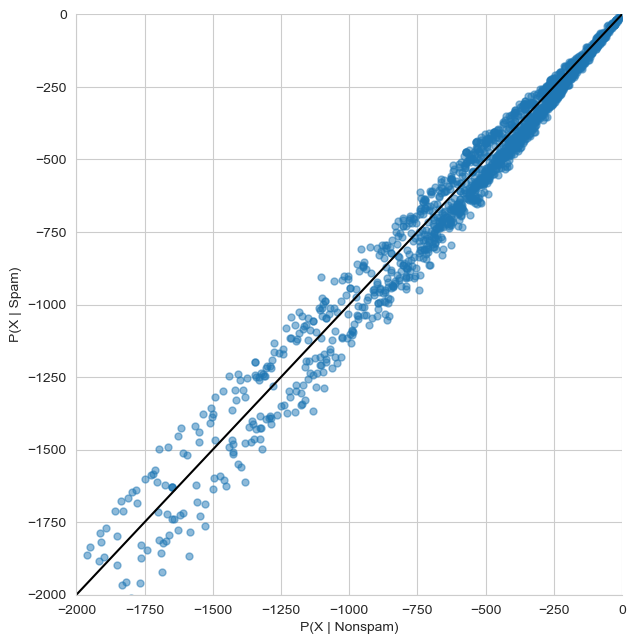

In [23]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, aspect=1, fit_reg=False,
          scatter_kws={"alpha": 0.5, "s": 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color="black")
plt.show()

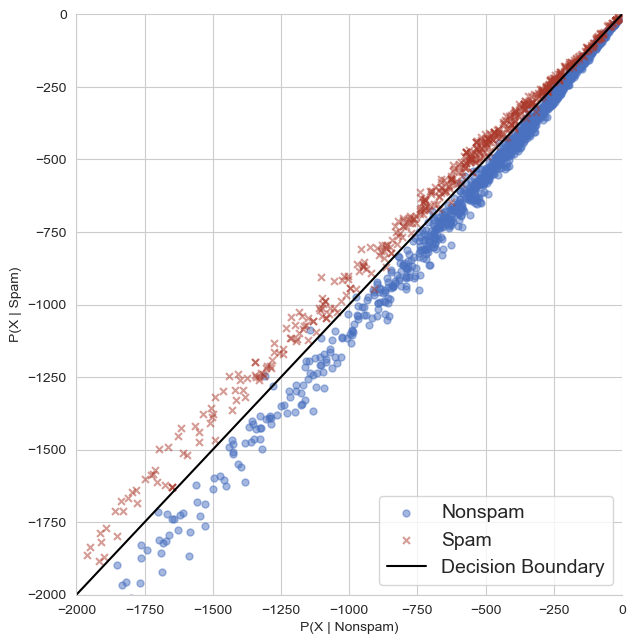

In [24]:
my_colours = ["#4A71C0", "#AB3A2C"]

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, aspect=1, fit_reg=False, legend=False,
          scatter_kws={"alpha": 0.5, "s": 25}, hue=labels, markers=["o", "x"], palette=my_colours)

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color="black")

plt.legend(("Nonspam", "Spam", "Decision Boundary"), loc="lower right", fontsize=14)

plt.show()

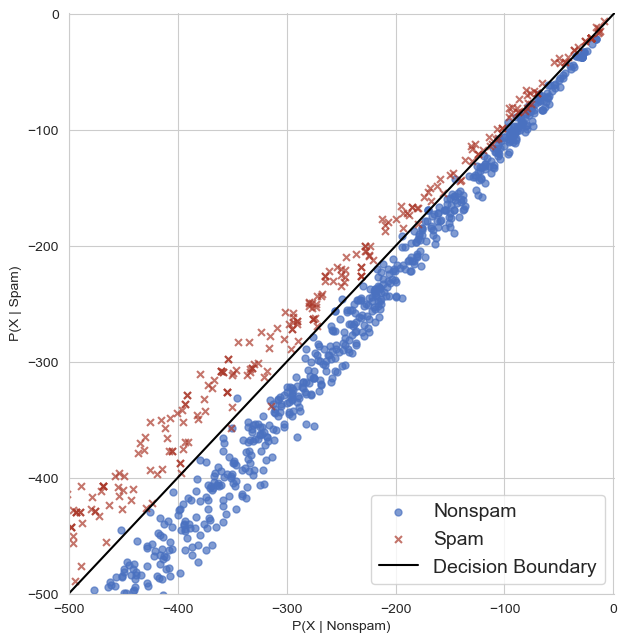

In [25]:
my_colours = ["#4A71C0", "#AB3A2C"]

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, aspect=1, fit_reg=False, legend=False,
          scatter_kws={"alpha": 0.7, "s": 25}, hue=labels, markers=["o", "x"], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color="black")

plt.legend(("Nonspam", "Spam", "Decision Boundary"), loc="lower right", fontsize=14)

plt.show()

### False Positives and False Negatives

In [26]:
np.unique(predictions, return_counts=True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [27]:
true_pos = (y_test == 1) & (predictions == 1)

In [28]:
true_pos.sum()

569

In [29]:
false_pos = (y_test == 0) & (predictions == 1)
false_pos.sum()

19

In [30]:
false_neg = (y_test == 1) & (predictions == 0)
false_neg.sum()

20

## Recall Score

$$ Recall \, Score = \frac{True \, Positives}{True \, Positives \, + \, False \, Negatives} $$

In [33]:
recall_score = true_pos.sum()/(true_pos.sum() + false_neg.sum())
print("Recall Score: {:.2%}".format(recall_score))

Recall Score: 96.60%


## Precision

$$ Precision = \frac{True \, Positives}{True \, Positives \, + \, False \, Positives} $$

In [39]:
precision = true_pos.sum()/(true_pos.sum() + false_pos.sum())
print("Precision: {:.3}".format(precision))

Precision: 0.968


## F-Score or F1-Score

$$ F1 \, Score = 2 * \frac{Precision \, * \, Recall}{Precision \, + \, Recall} $$

In [40]:
f1_score = 2* (precision * recall_score) / (precision + recall_score)
print("F Score: {:.2}".format(f1_score))

F Score: 0.97
